In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from superpoint.settings import EXPER_PATH
import superpoint.evaluations.detector_evaluation as ev
from utils import plot_imgs
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
experiments = ['magic-point_synth-v2_real', 'harris_synth-v2', 'shi_synth-v2', 'fast_synth-v2']
confidence_thresholds = [0.4, 90000, 0.06, 40]

# PR curve

> magic-point_synth-v2_real
mAP: 0.9799515726822746
> harris_synth-v2
mAP: 0.10281369877727461
> shi_synth-v2
mAP: 0.3513142228103091
> fast_synth-v2
mAP: 0.60214309402838


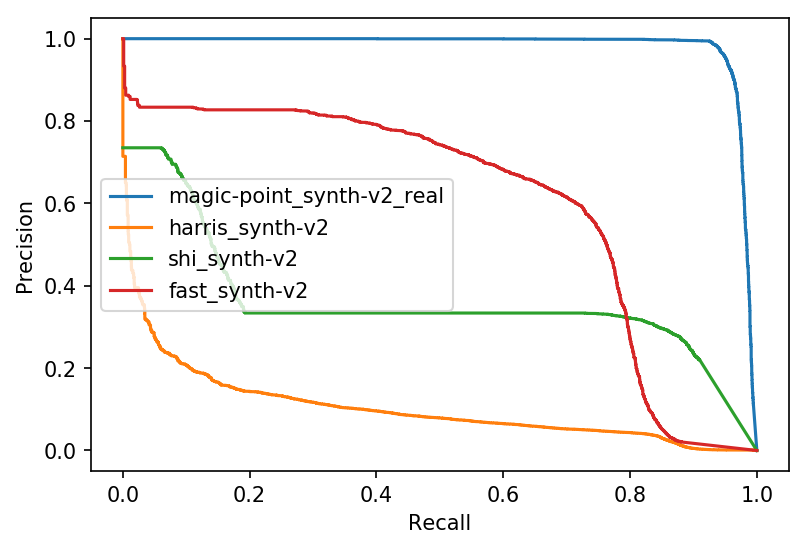

In [3]:
plt.figure(dpi=150)
for e in experiments:
    p, r, prob = ev.compute_pr(e, distance_thresh=4)
    plt.plot(r, p, label=e);
    
    mAP = ev.compute_mAP(p, r)
    print('> {}'.format(e))
    print('mAP: {}'.format(mAP))
plt.legend(), plt.xlabel('Recall'), plt.ylabel('Precision');

# Localization Error

In [4]:
for e, t in zip(experiments, confidence_thresholds):
    error = ev.compute_loc_error(e, prob_thresh=t, distance_thresh=4)
    print('> {}: {}'.format(e, error))

> magic-point_synth-v2_real: 0.17734734059836418
> harris_synth-v2: 2.106410935508267
> shi_synth-v2: 1.6652815295339414
> fast_synth-v2: 2.02653952735985


# Visualization

In [5]:
def draw_keypoints(img, corners, color):
    keypoints = [cv2.KeyPoint(c[1], c[0], 1) for c in np.stack(corners).T]
    return cv2.drawKeypoints(img.astype(np.uint8), keypoints, None, color=color)

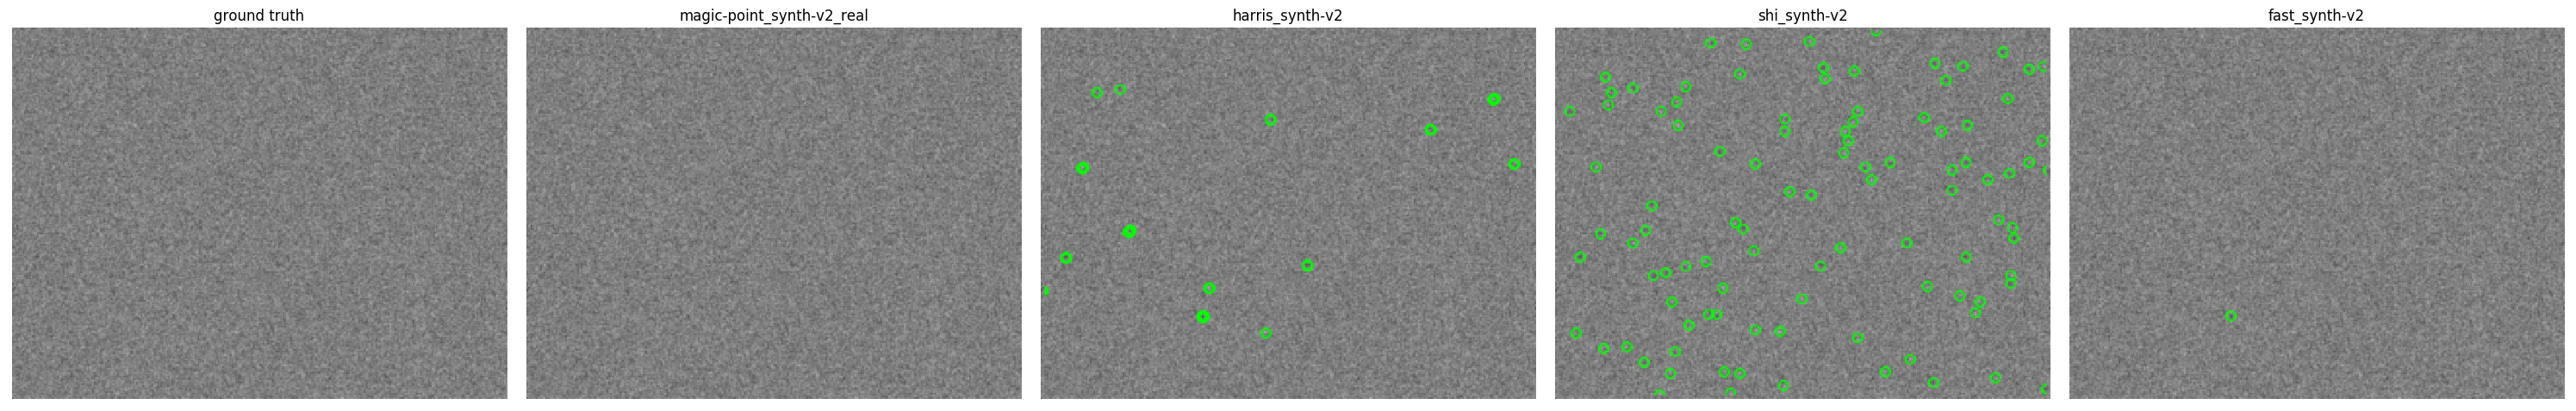

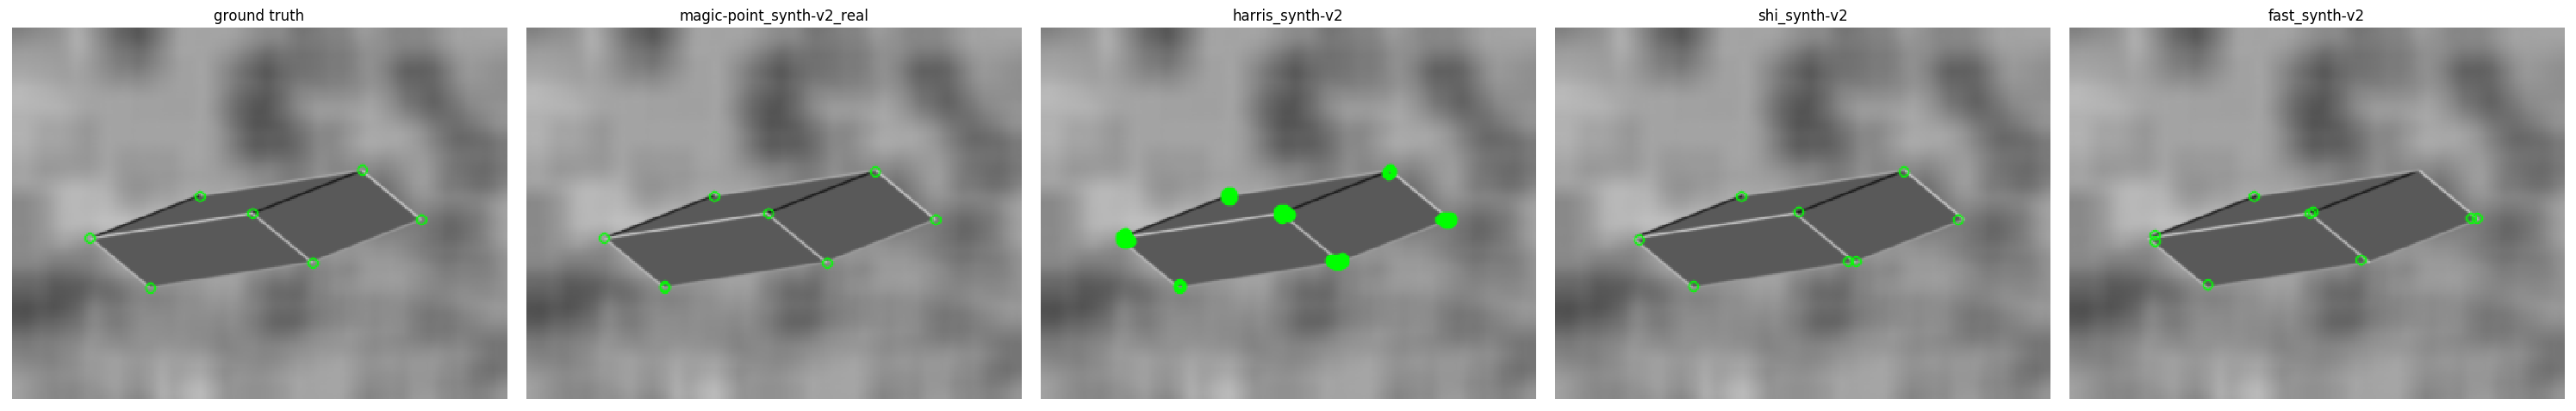

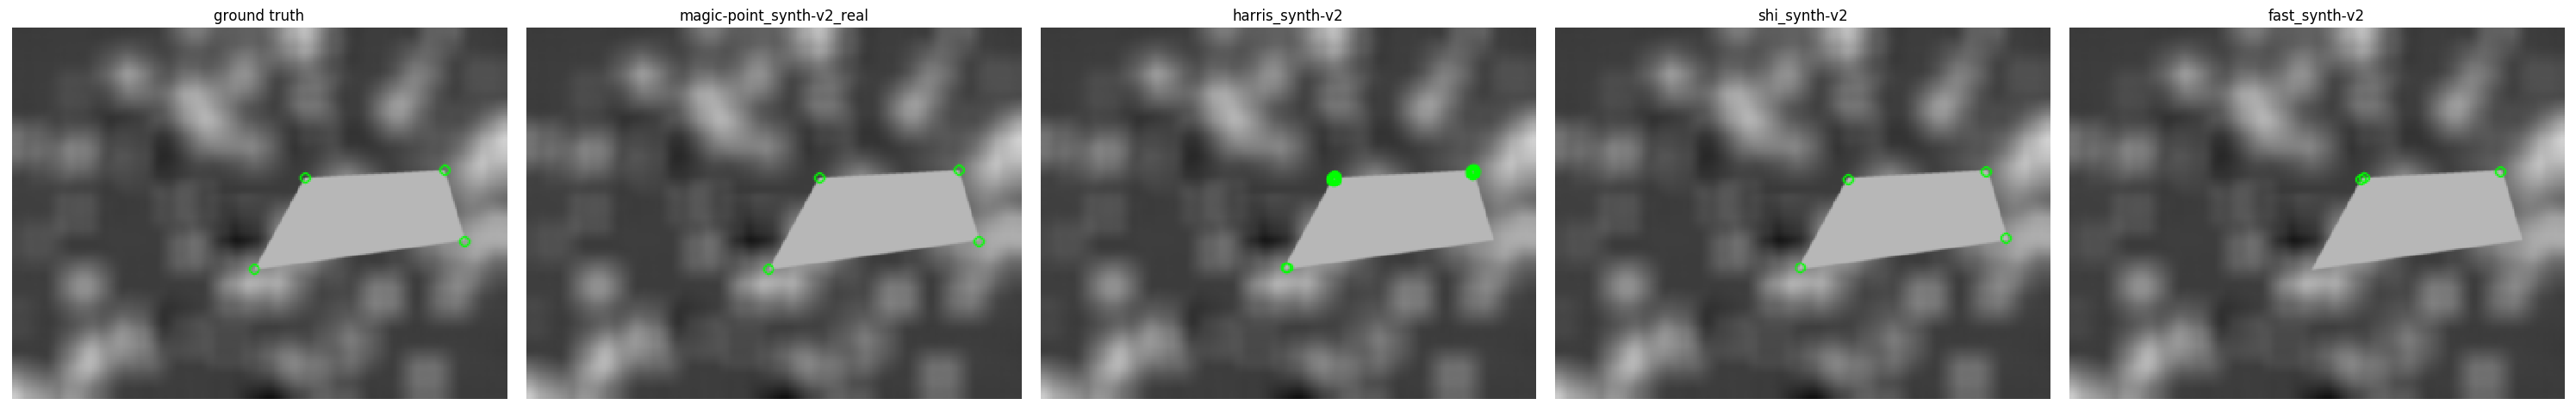

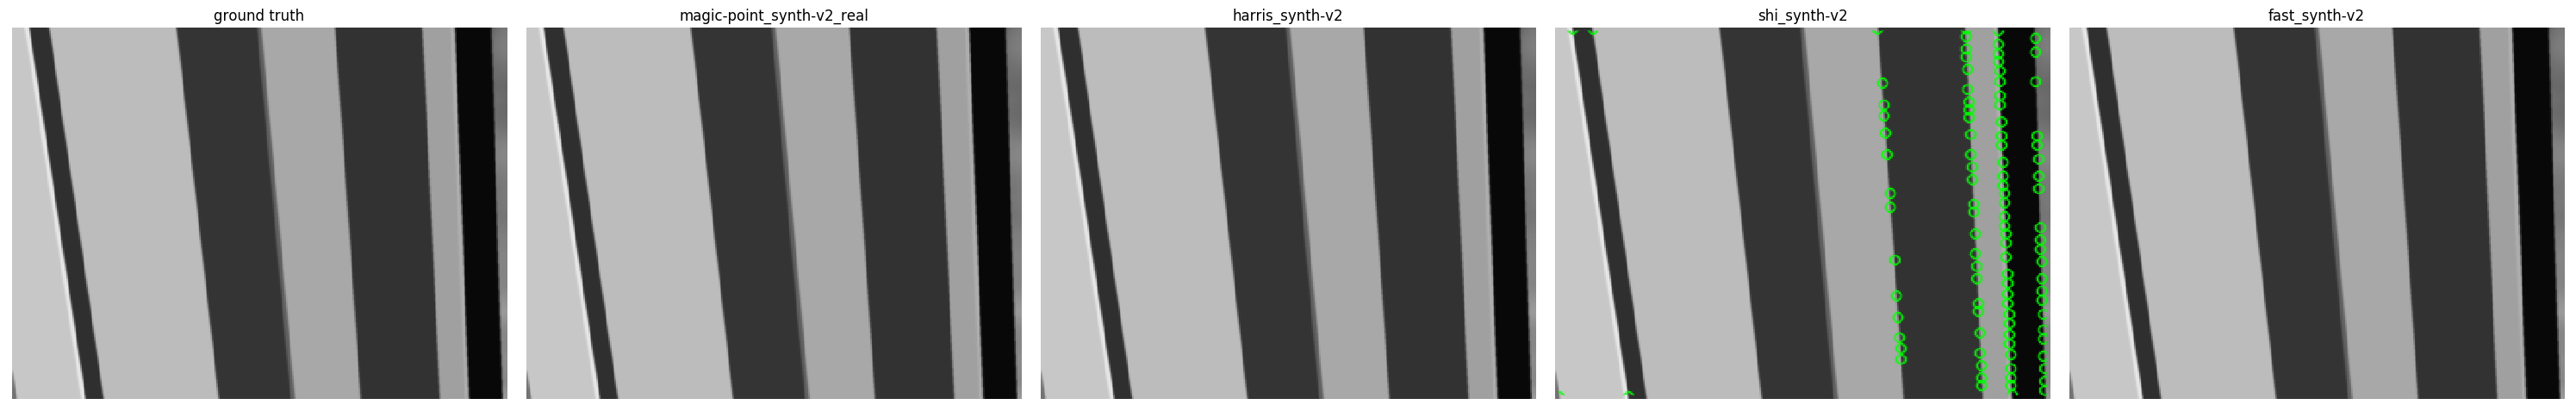

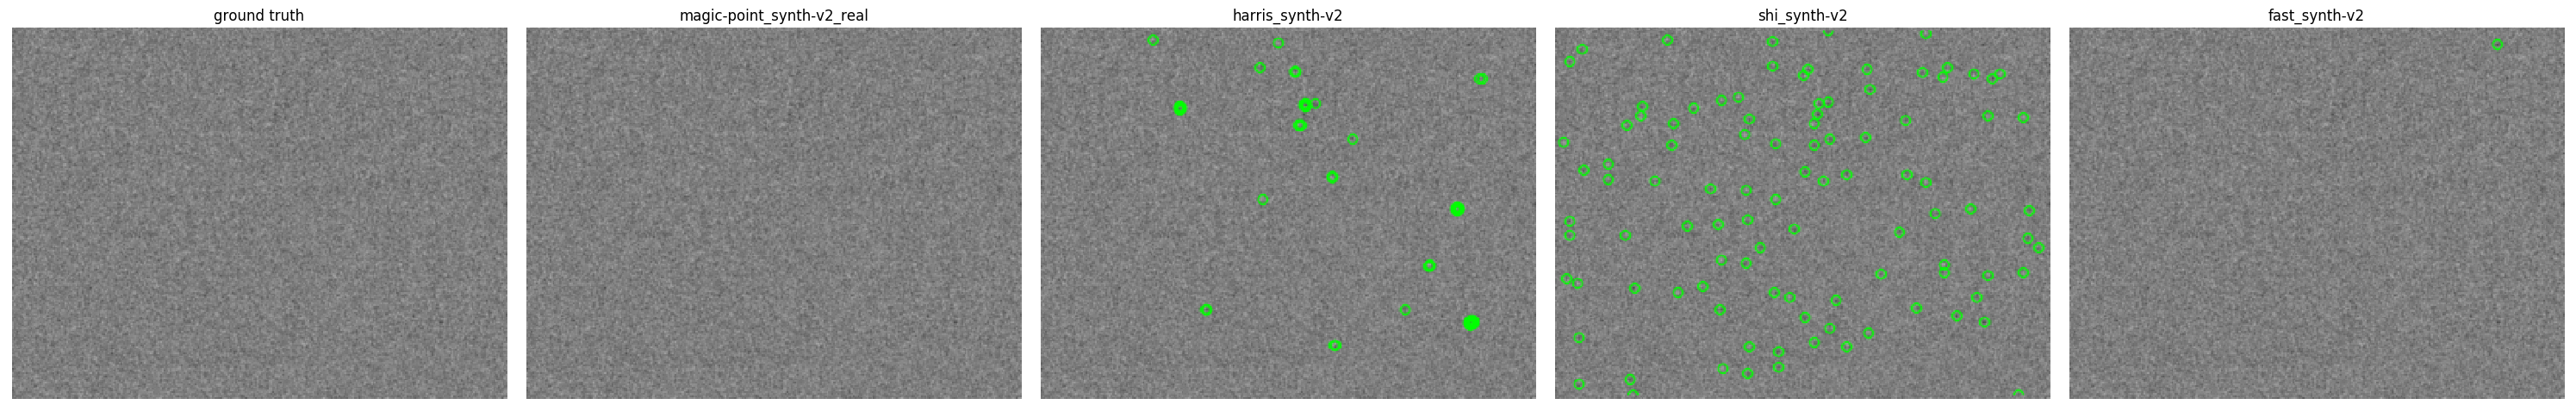

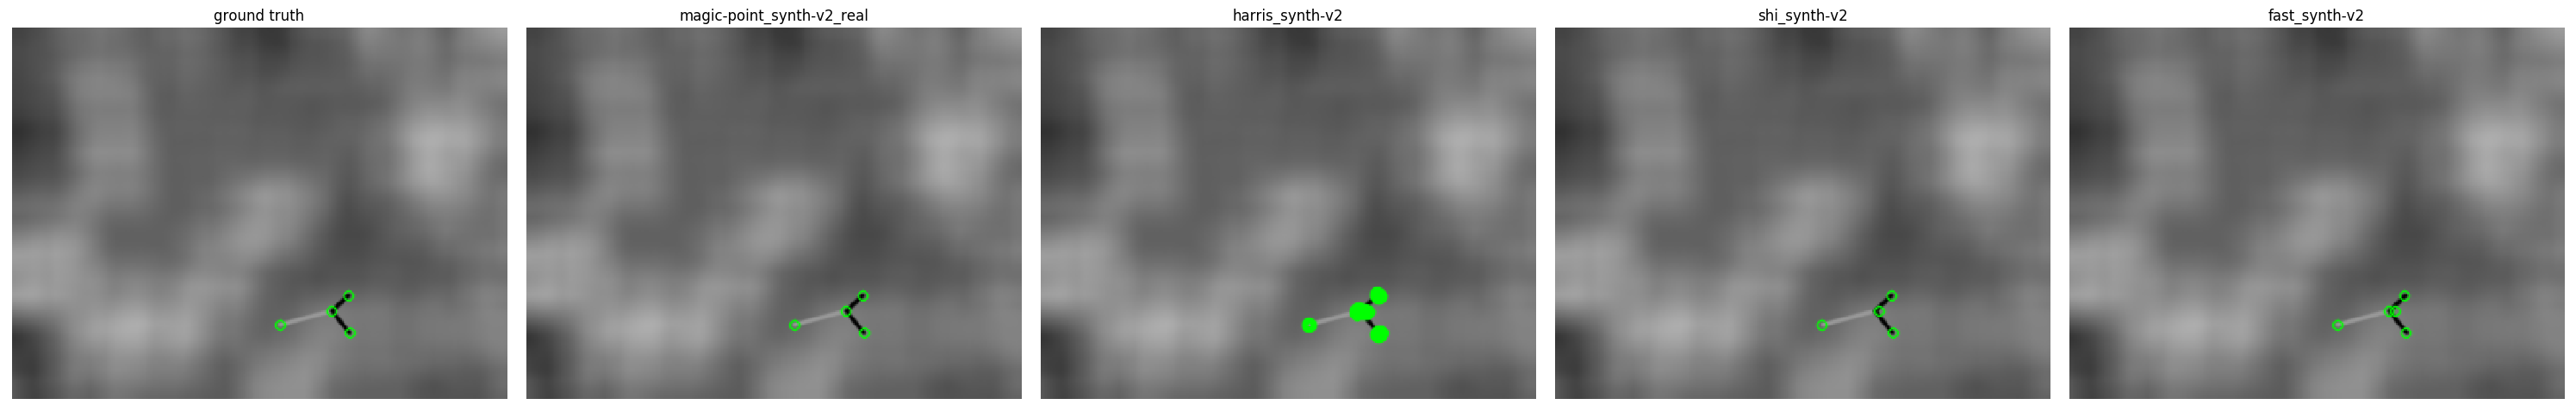

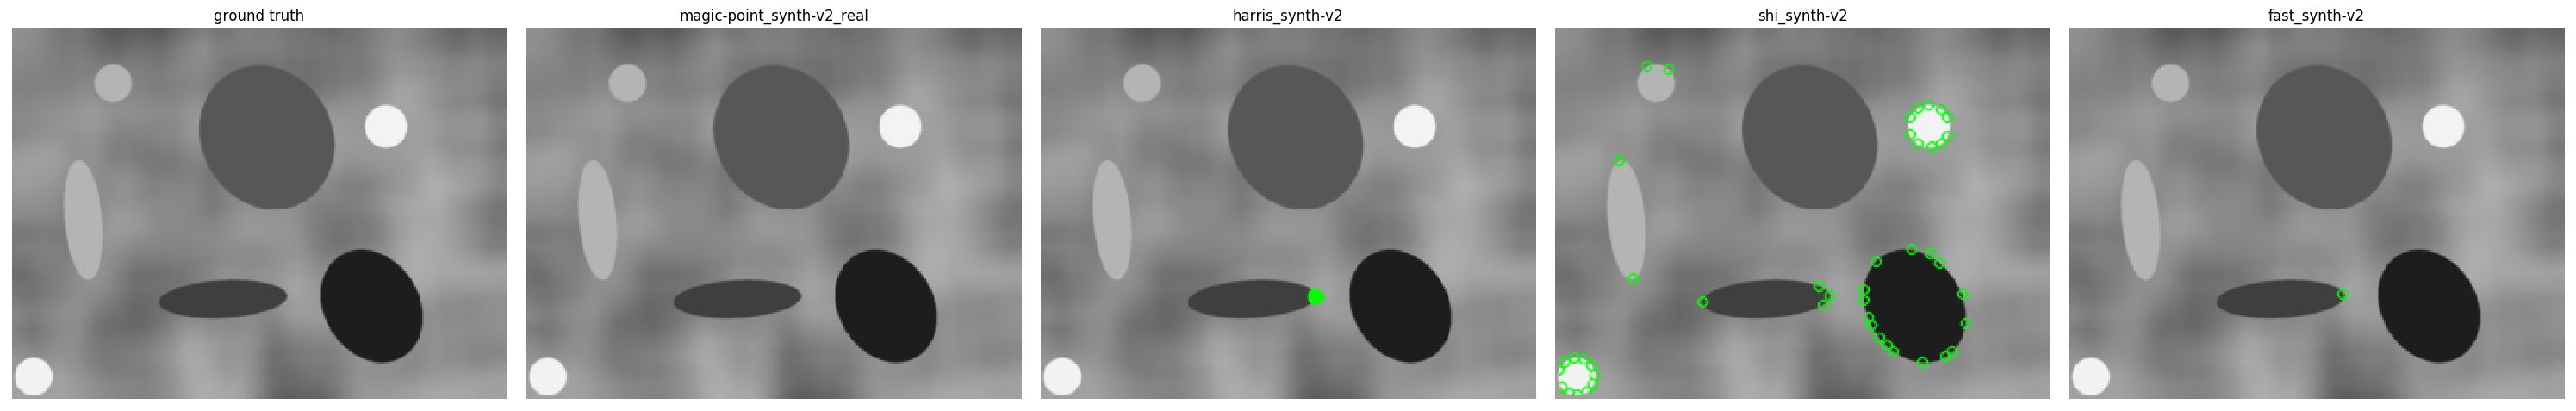

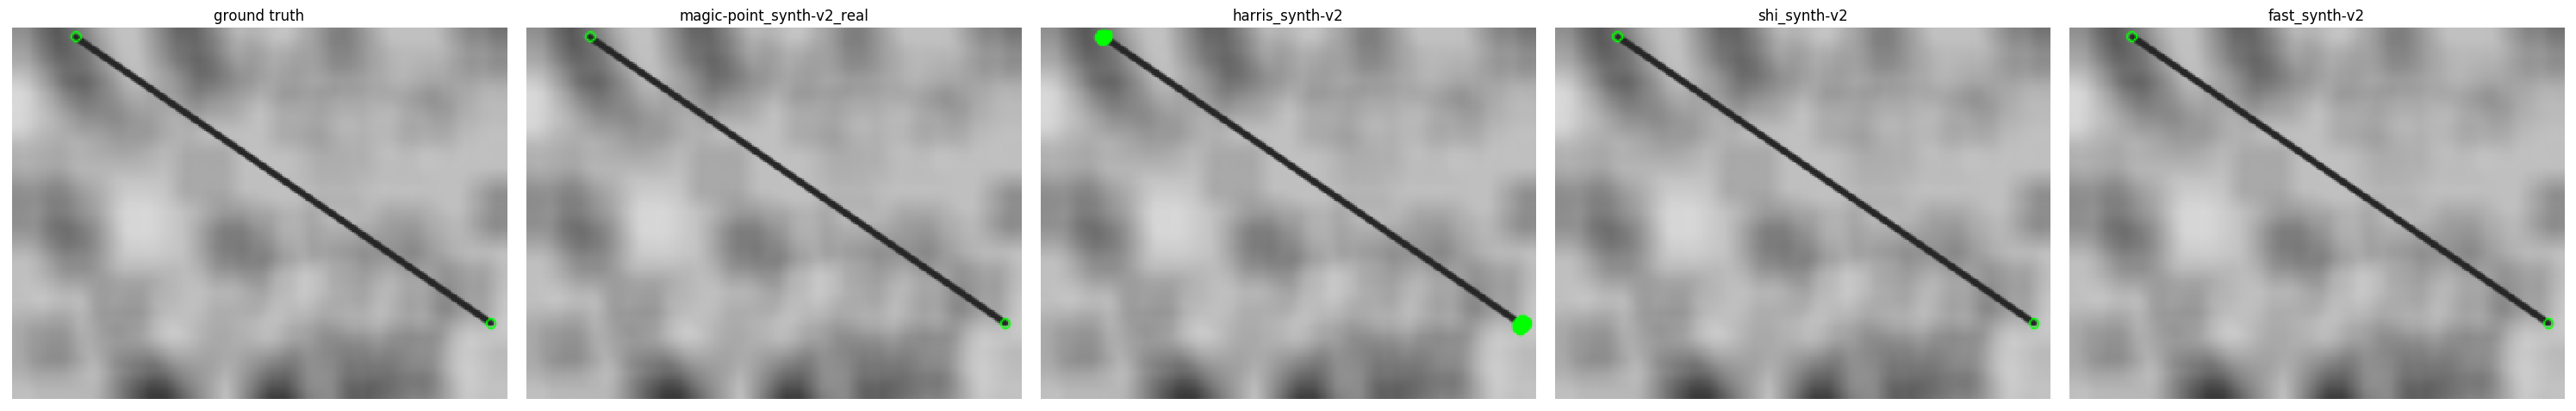

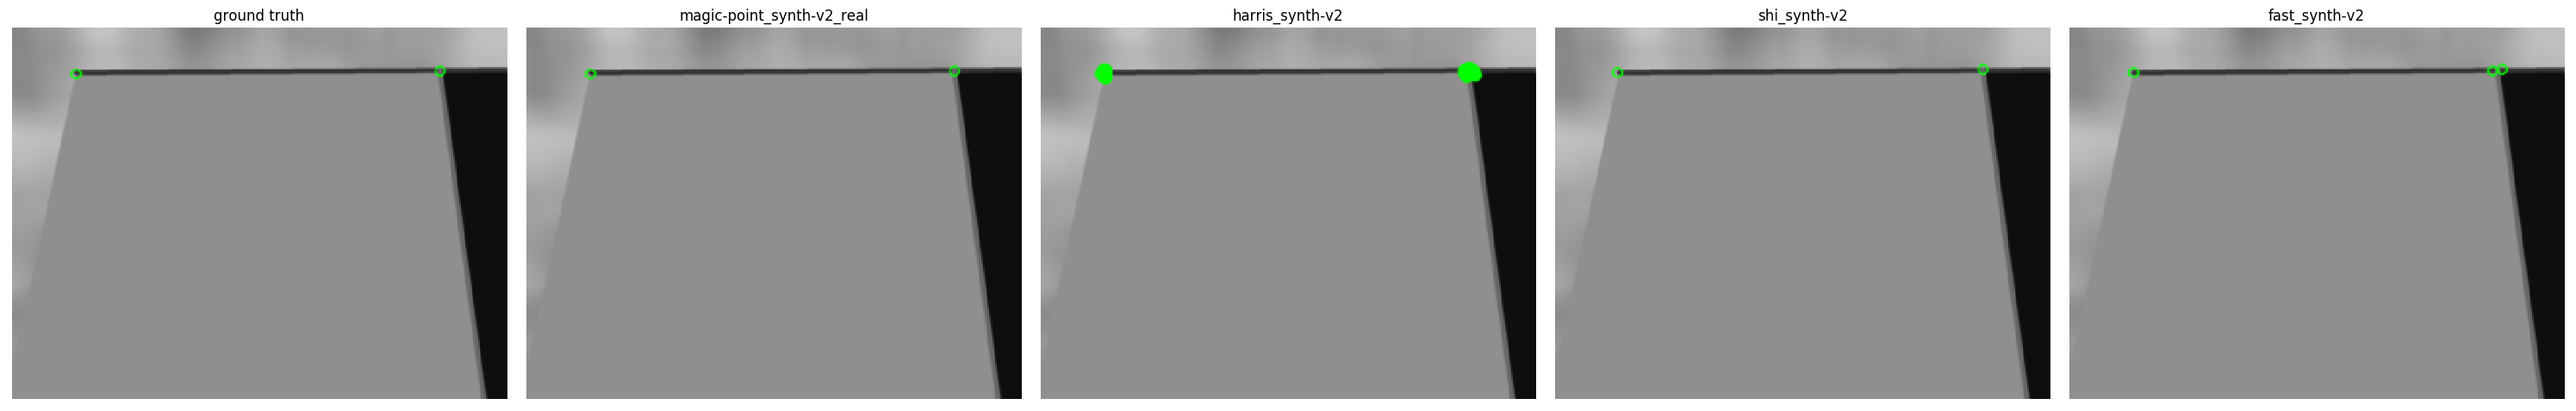

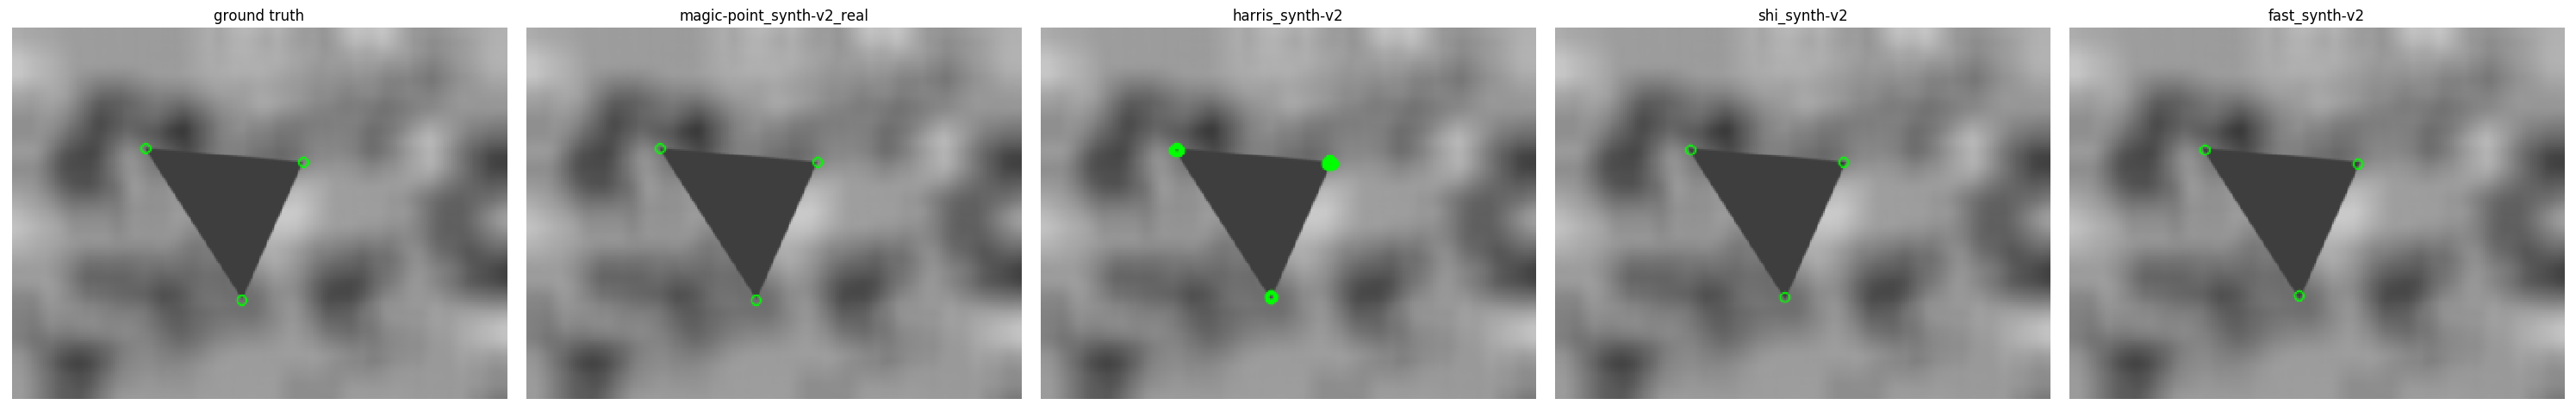

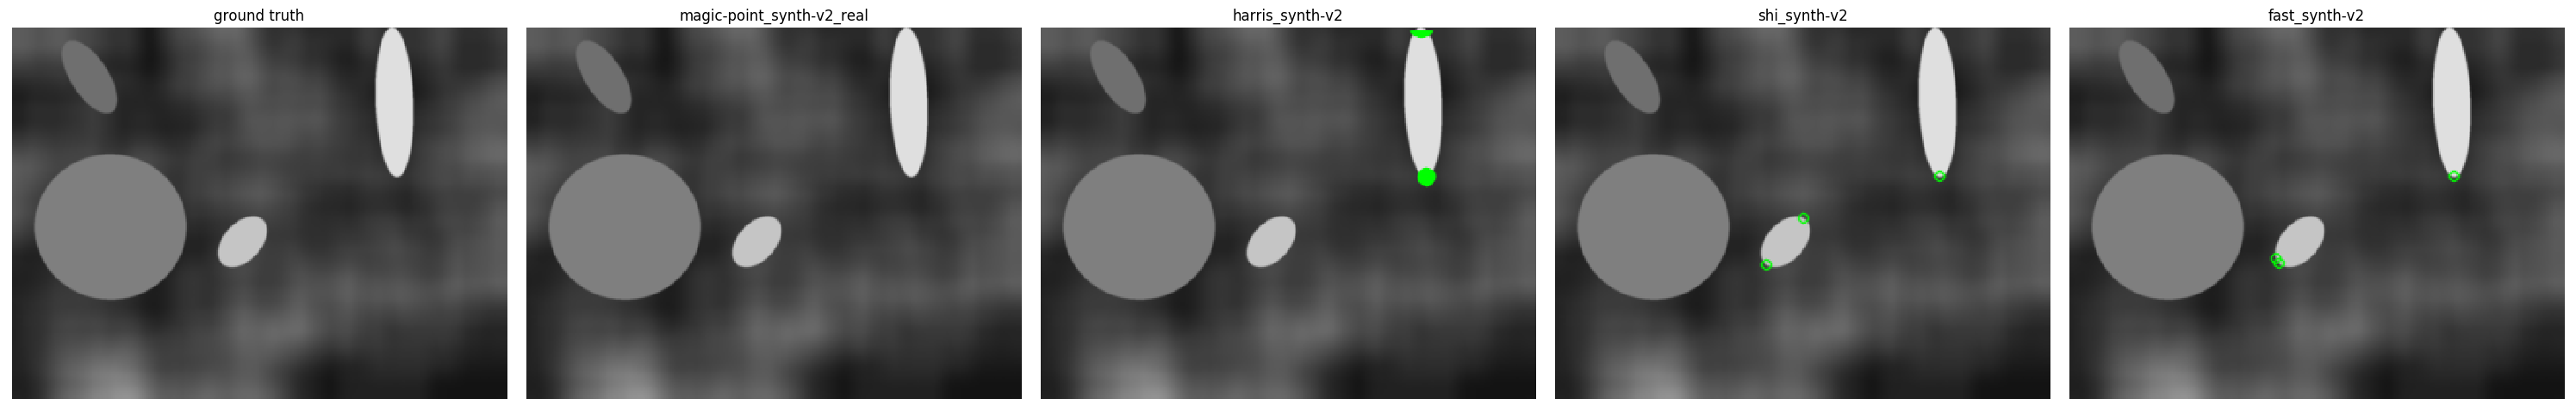

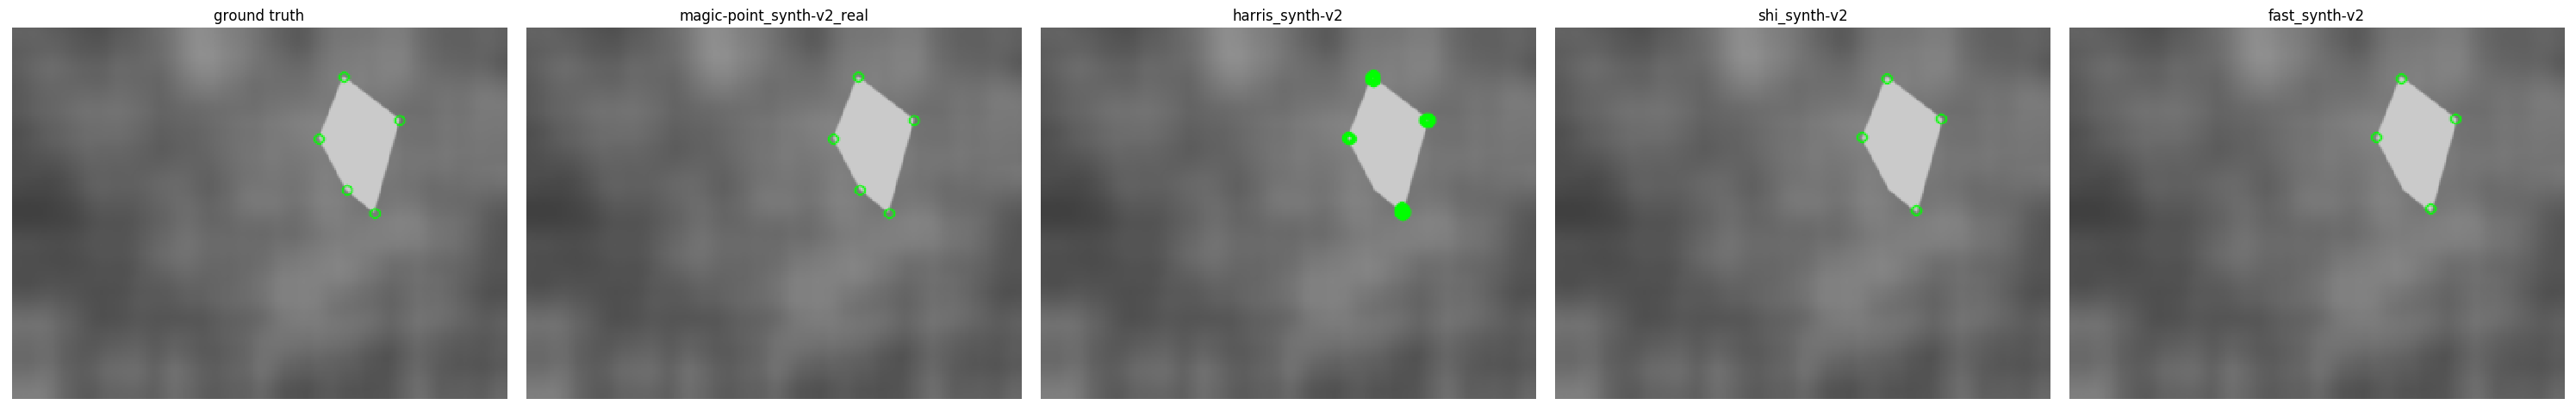

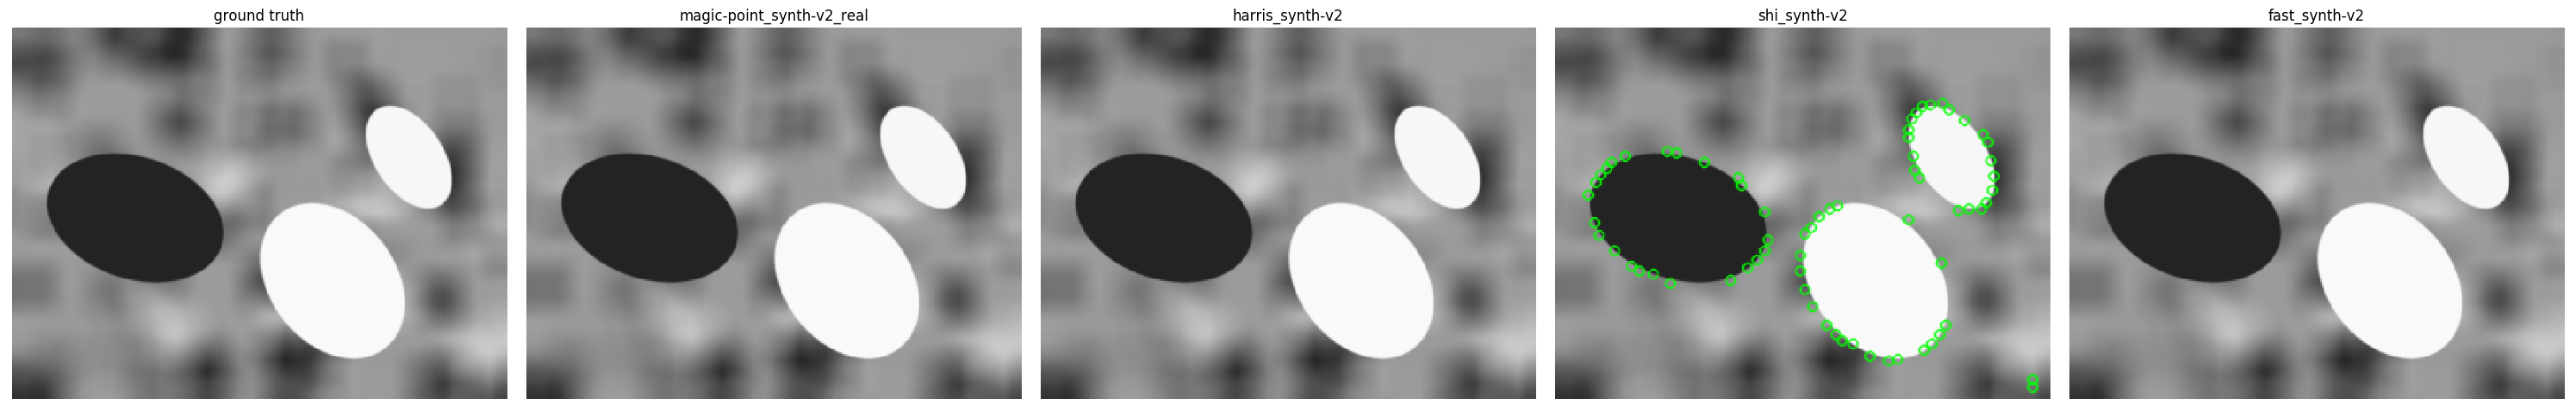

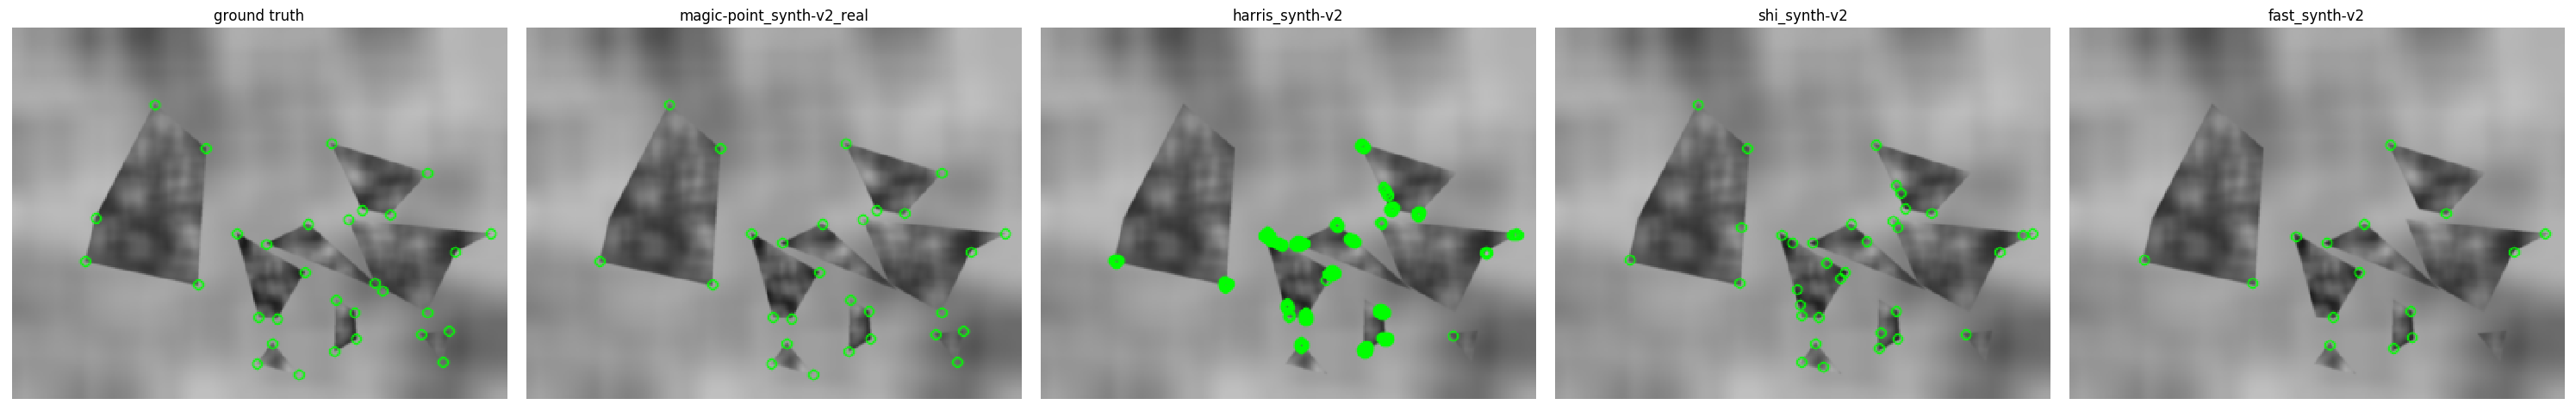

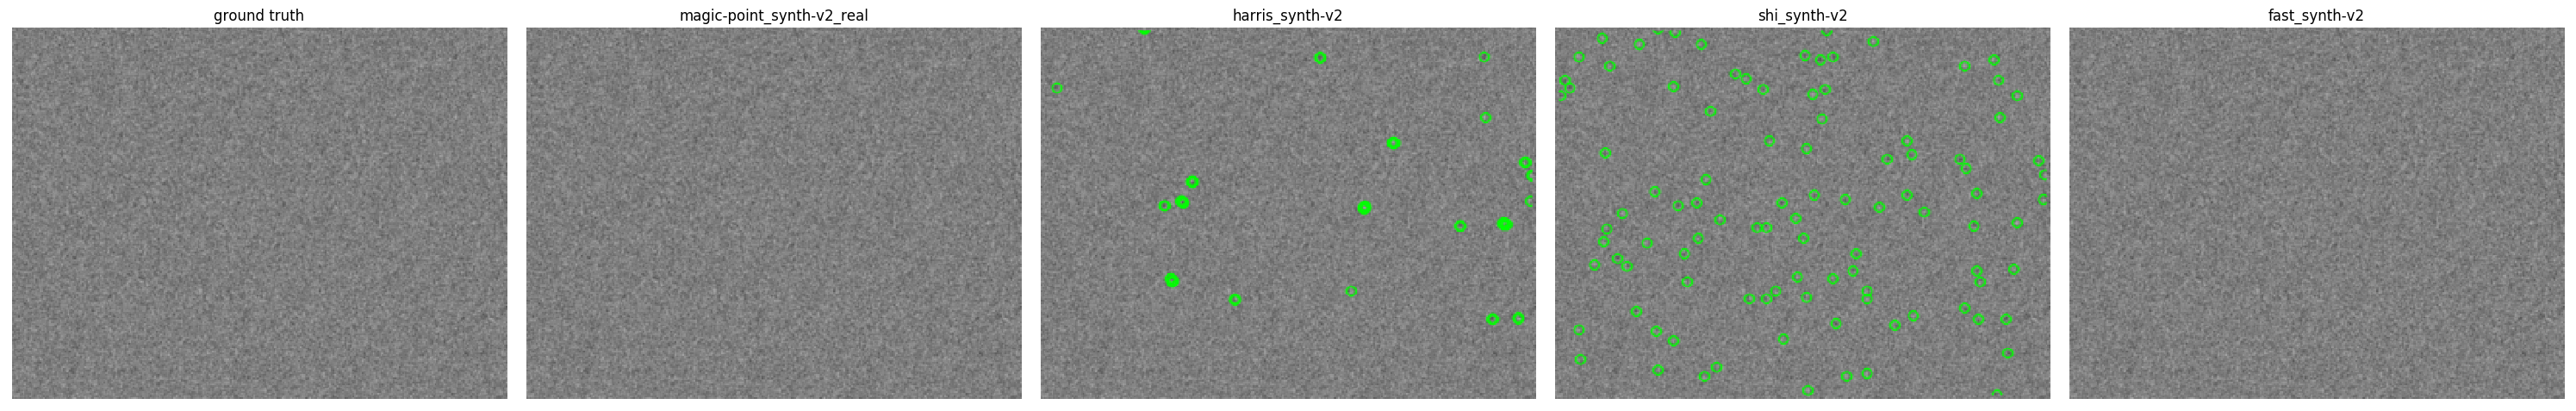

In [6]:
paths = [ev.get_paths(e) for e in experiments]
for i in range(15):
    images = []
    for j, (e, t) in enumerate(zip(experiments, confidence_thresholds)):
        data = np.load(paths[j][i])
        if e == experiments[0]:
            images.append(draw_keypoints(data['image'], np.where(data['keypoint_map']), (0, 255, 0)))
        images.append(draw_keypoints(data['image'], np.where(data['prob'] > t), (0, 255, 0)))
    plot_imgs([im/255. for im in images], titles=['ground truth']+experiments)